# License Plate Finder
Michael Edenzon and Griffin Hiers

In [23]:
import os
import CVFunctions as cv
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
%matplotlib inline

#### load dataset

In [24]:
filenames = os.listdir('dataset')
images = []
for filename in filenames:
    if filename[-4:] == '.jpg':
        images.append(cv2.imread('dataset/' + filename,0))

## original image

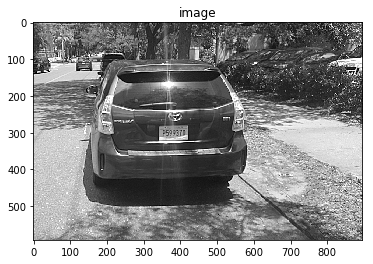

In [44]:
img0 = cv2.imread('live_image.jpg',0)
img1 = img0
cv.draw(img1,'image')

## directional gaussian blur

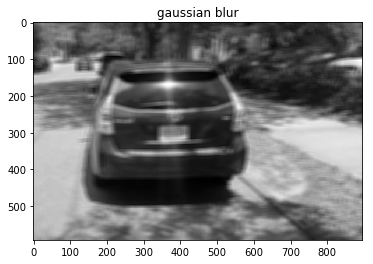

In [45]:
img2 = cv2.GaussianBlur(img1, (19,11), 100)
cv.draw(img2,title='gaussian blur')

## thresh

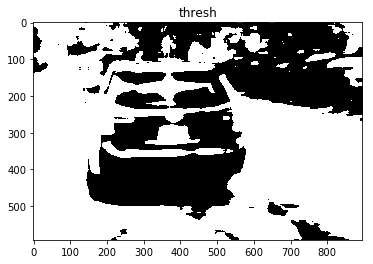

In [46]:
img3 = cv.thresh(img2,85, 255, cv2.THRESH_BINARY)
cv.draw(img3,title='thresh')

## find contours

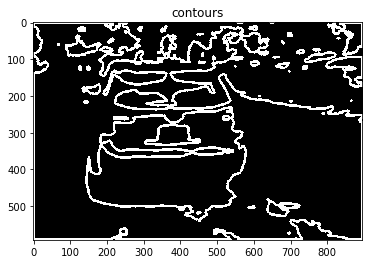

In [47]:
cnt = cv.findContours(img3)
img4 = cv.imageFromContours(cnt,img3)
cv.draw(img4,title='contours')

## mask from contours

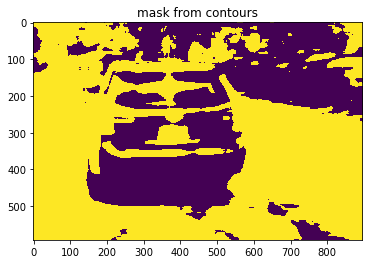

In [48]:
img5 = cv.maskFromContours(cnt,img0)
cv.draw(img5,title='mask from contours',gray=False)

## find bounding boxes

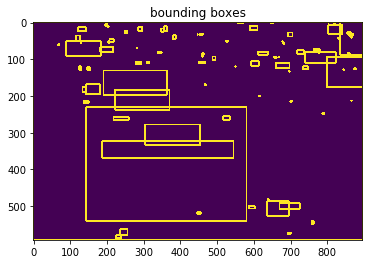

In [49]:
img6 = cv.boundingBoxImage(cnt,img0)
cv.draw(img6,title='bounding boxes',gray=False)

## remove noise contours

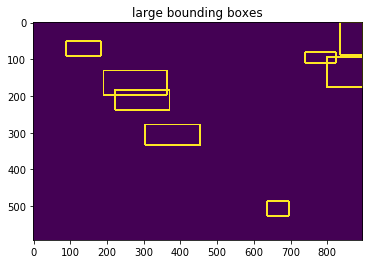

In [50]:
lcnt = cv.getLargeContours(cnt,img0.shape)
img7 = cv.boundingBoxImage(lcnt,img0)
cv.draw(img7,title='large bounding boxes',gray=False)

## find possible plate contours

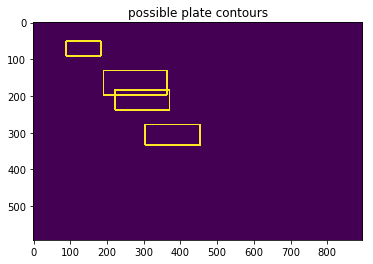

In [51]:
ppcnt = cv.possiblePlateContours(lcnt,img0)
img8 = cv.boundingBoxImage(ppcnt,img0)
cv.draw(img8,title='possible plate contours',gray=False)

## project possible plates

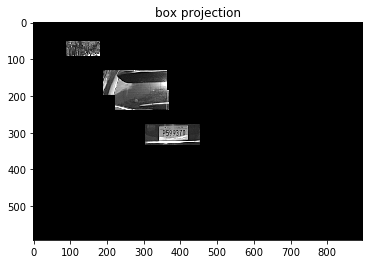

In [52]:
img9 = cv.boxProjectionFromContours(ppcnt,img0)
cv.draw(img9,title='box projection')

## possible plates

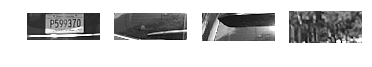

In [53]:
cv.display(cv.projectPossiblePlates(ppcnt,img0))